In [14]:
from imgann import Sample
import pandas as pd
import shutil
import os

## Download

In [2]:
def download_unzip(url, output_path):
  os.makedirs(folder, exist_ok=True)
  os.system(f'wget -O {output_path}.zip {url}')
  os.system(f'unzip {output_path}.zip -d {output_path}')
  os.system(f'rm {output_path}.zip')

download_url = 'https://ftp.nmdc.no/nmdc/IMR/MachineLearning/fishDatasetSimulationAlgorithm.zip'
folder = '../downloads'
dataset_name = 'deep_vision'
local_path = f'{folder}/{dataset_name}'
download_unzip(download_url, local_path)

--2024-02-25 18:22:45--  https://ftp.nmdc.no/nmdc/IMR/MachineLearning/fishDatasetSimulationAlgorithm.zip
Resolving ftp.nmdc.no (ftp.nmdc.no)... 158.37.28.100
Connecting to ftp.nmdc.no (ftp.nmdc.no)|158.37.28.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 376119042 (359M) [application/zip]
Saving to: ‘../downloads/deep_vision.zip’

     0K .......... .......... .......... .......... ..........  0%  900K 6m48s
    50K .......... .......... .......... .......... ..........  0% 1.78M 5m5s
   100K .......... .......... .......... .......... ..........  0% 51.6M 3m26s
   150K .......... .......... .......... .......... ..........  0% 1.84M 3m23s
   200K .......... .......... .......... .......... ..........  0% 67.9M 2m43s
   250K .......... .......... .......... .......... ..........  0% 74.4M 2m17s
   300K .......... .......... .......... .......... ..........  0% 77.8M 1m58s
   350K .......... .......... .......... .......... ..........  0% 1.90M 2m7s
   400

Archive:  ../downloads/deep_vision.zip
   creating: ../downloads/deep_vision/fish_dataset/
  inflating: ../downloads/deep_vision/fish_dataset/test_annotations.csv  
   creating: ../downloads/deep_vision/fish_dataset/2017/
   creating: ../downloads/deep_vision/fish_dataset/2017/train/
   creating: ../downloads/deep_vision/fish_dataset/2017/train/source-images/
   creating: ../downloads/deep_vision/fish_dataset/2017/train/source-images/mackerel/
  inflating: ../downloads/deep_vision/fish_dataset/2017/train/source-images/mackerel/ST036-166-20170522213100169.jpg  
  inflating: ../downloads/deep_vision/fish_dataset/2017/train/source-images/mackerel/ST036-266-20170522214745922.jpg  
  inflating: ../downloads/deep_vision/fish_dataset/2017/train/source-images/mackerel/ST036-94-20170522180312897.jpg  
  inflating: ../downloads/deep_vision/fish_dataset/2017/train/source-images/mackerel/ST036-645-41-20170522214239476.jpg  
  inflating: ../downloads/deep_vision/fish_dataset/2017/train/source-image

## Visualise

In [62]:
# Merge all annotations to have a single overview of the dataset
dataset_path = os.path.join(local_path, 'fish_dataset')

annotations = ['test_annotations.csv', 'val_annotations.csv', '2017/train/source-train2017-annotations.csv', '2018/train/source-train2018-annotations.csv']

annotations_dfs = []

for annotation in annotations:
  df = pd.read_csv(os.path.join(dataset_path, annotation), names=['filename', 'xmin', 'ymin', 'xmax', 'ymax', 'class'])
  # convert xmin, ymin, xmax, ymax to int
  # Print type of xmin
  if df['xmin'].dtype != 'int64':
    print('xmin is object')
    for col in ['xmin', 'ymin', 'xmax', 'ymax']:
      df[col] = pd.to_numeric(df[col], errors='coerce')
      df[col] = df[col].fillna(0)
      df[col] = df[col].astype(int)

  annotations_dfs.append(df)

df = pd.concat(annotations_dfs)

# edit the filename to have only the basename
df['filename'] = df['filename'].apply(lambda x: os.path.basename(x))

# add dummy height and width for dataset preview
df['width'] = 0
df['height'] = 0

df.to_csv(os.path.join(dataset_path, 'annotations.csv'), index=False)


xmin is object


In [64]:
# Move all bbox images to a single folder
images_folder = os.path.join(dataset_path, 'images')
os.makedirs(images_folder, exist_ok=True)

for root, dirs, files in os.walk(dataset_path):
  for file in files:
    if file.endswith('.jpg') and 'crops' not in root:
      # copy if file is not already in the images folder
      if root != images_folder:
        shutil.copy(os.path.join(root, file), images_folder)



INFO:imgann.sample:
                            IMAGE ANNOTATION SUMMARY                            
number of images         : 1875
folder image counts      :
                         > images : 1875
number of image sizes    : 1
image_size               : 0 X 0
number of object classes : 5
object classes           : mackerel | mesopelagic | bluewhiting | herring | class
number of objects        : 4834
class object count       :
                         > mackerel    : 1065
                         > mesopelagic : 921
                         > bluewhiting : 933
                         > herring     : 1914
                         > class       : 1



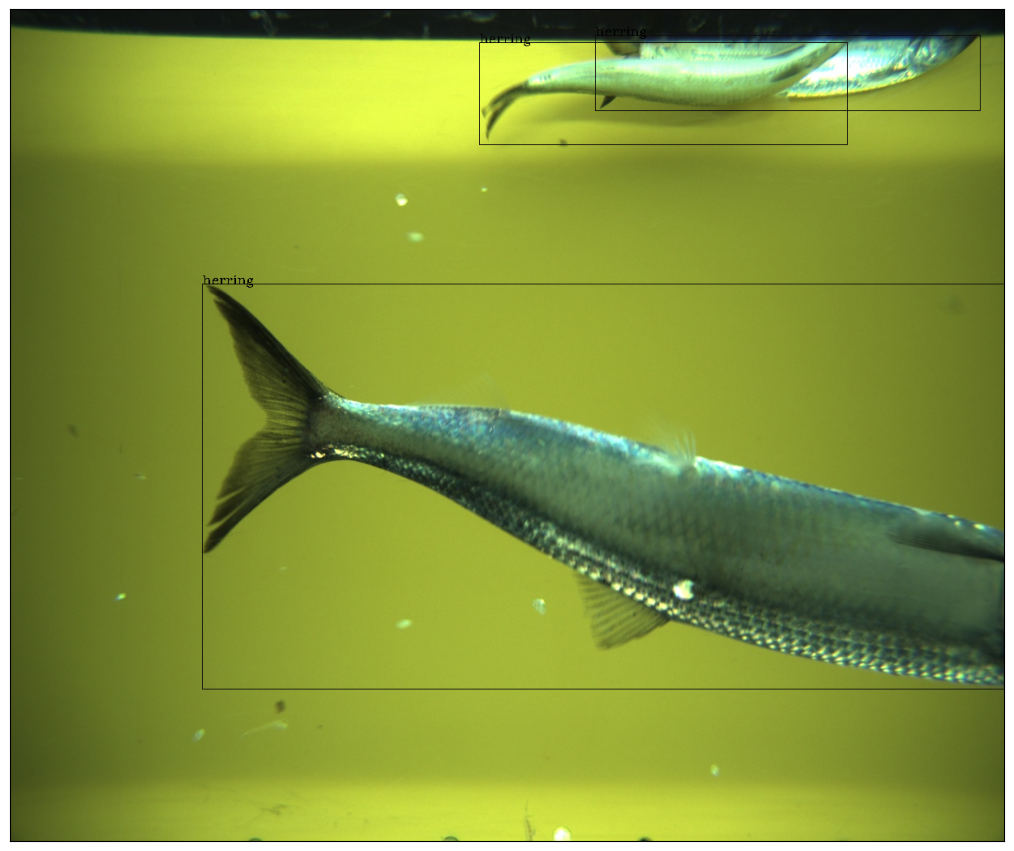

In [70]:
format = 'csv'

Sample.describe_ann(
  data_path = images_folder,
  ann_path = os.path.join(dataset_path, 'annotations.csv'),
  ann_type = format
)

Sample.show_samples(
  data_path = images_folder,
  ann_path = os.path.join(dataset_path, 'annotations.csv'),
  ann_type = format,
  num_of_samples = 1,
  image_shape=[1920, 1080]
)